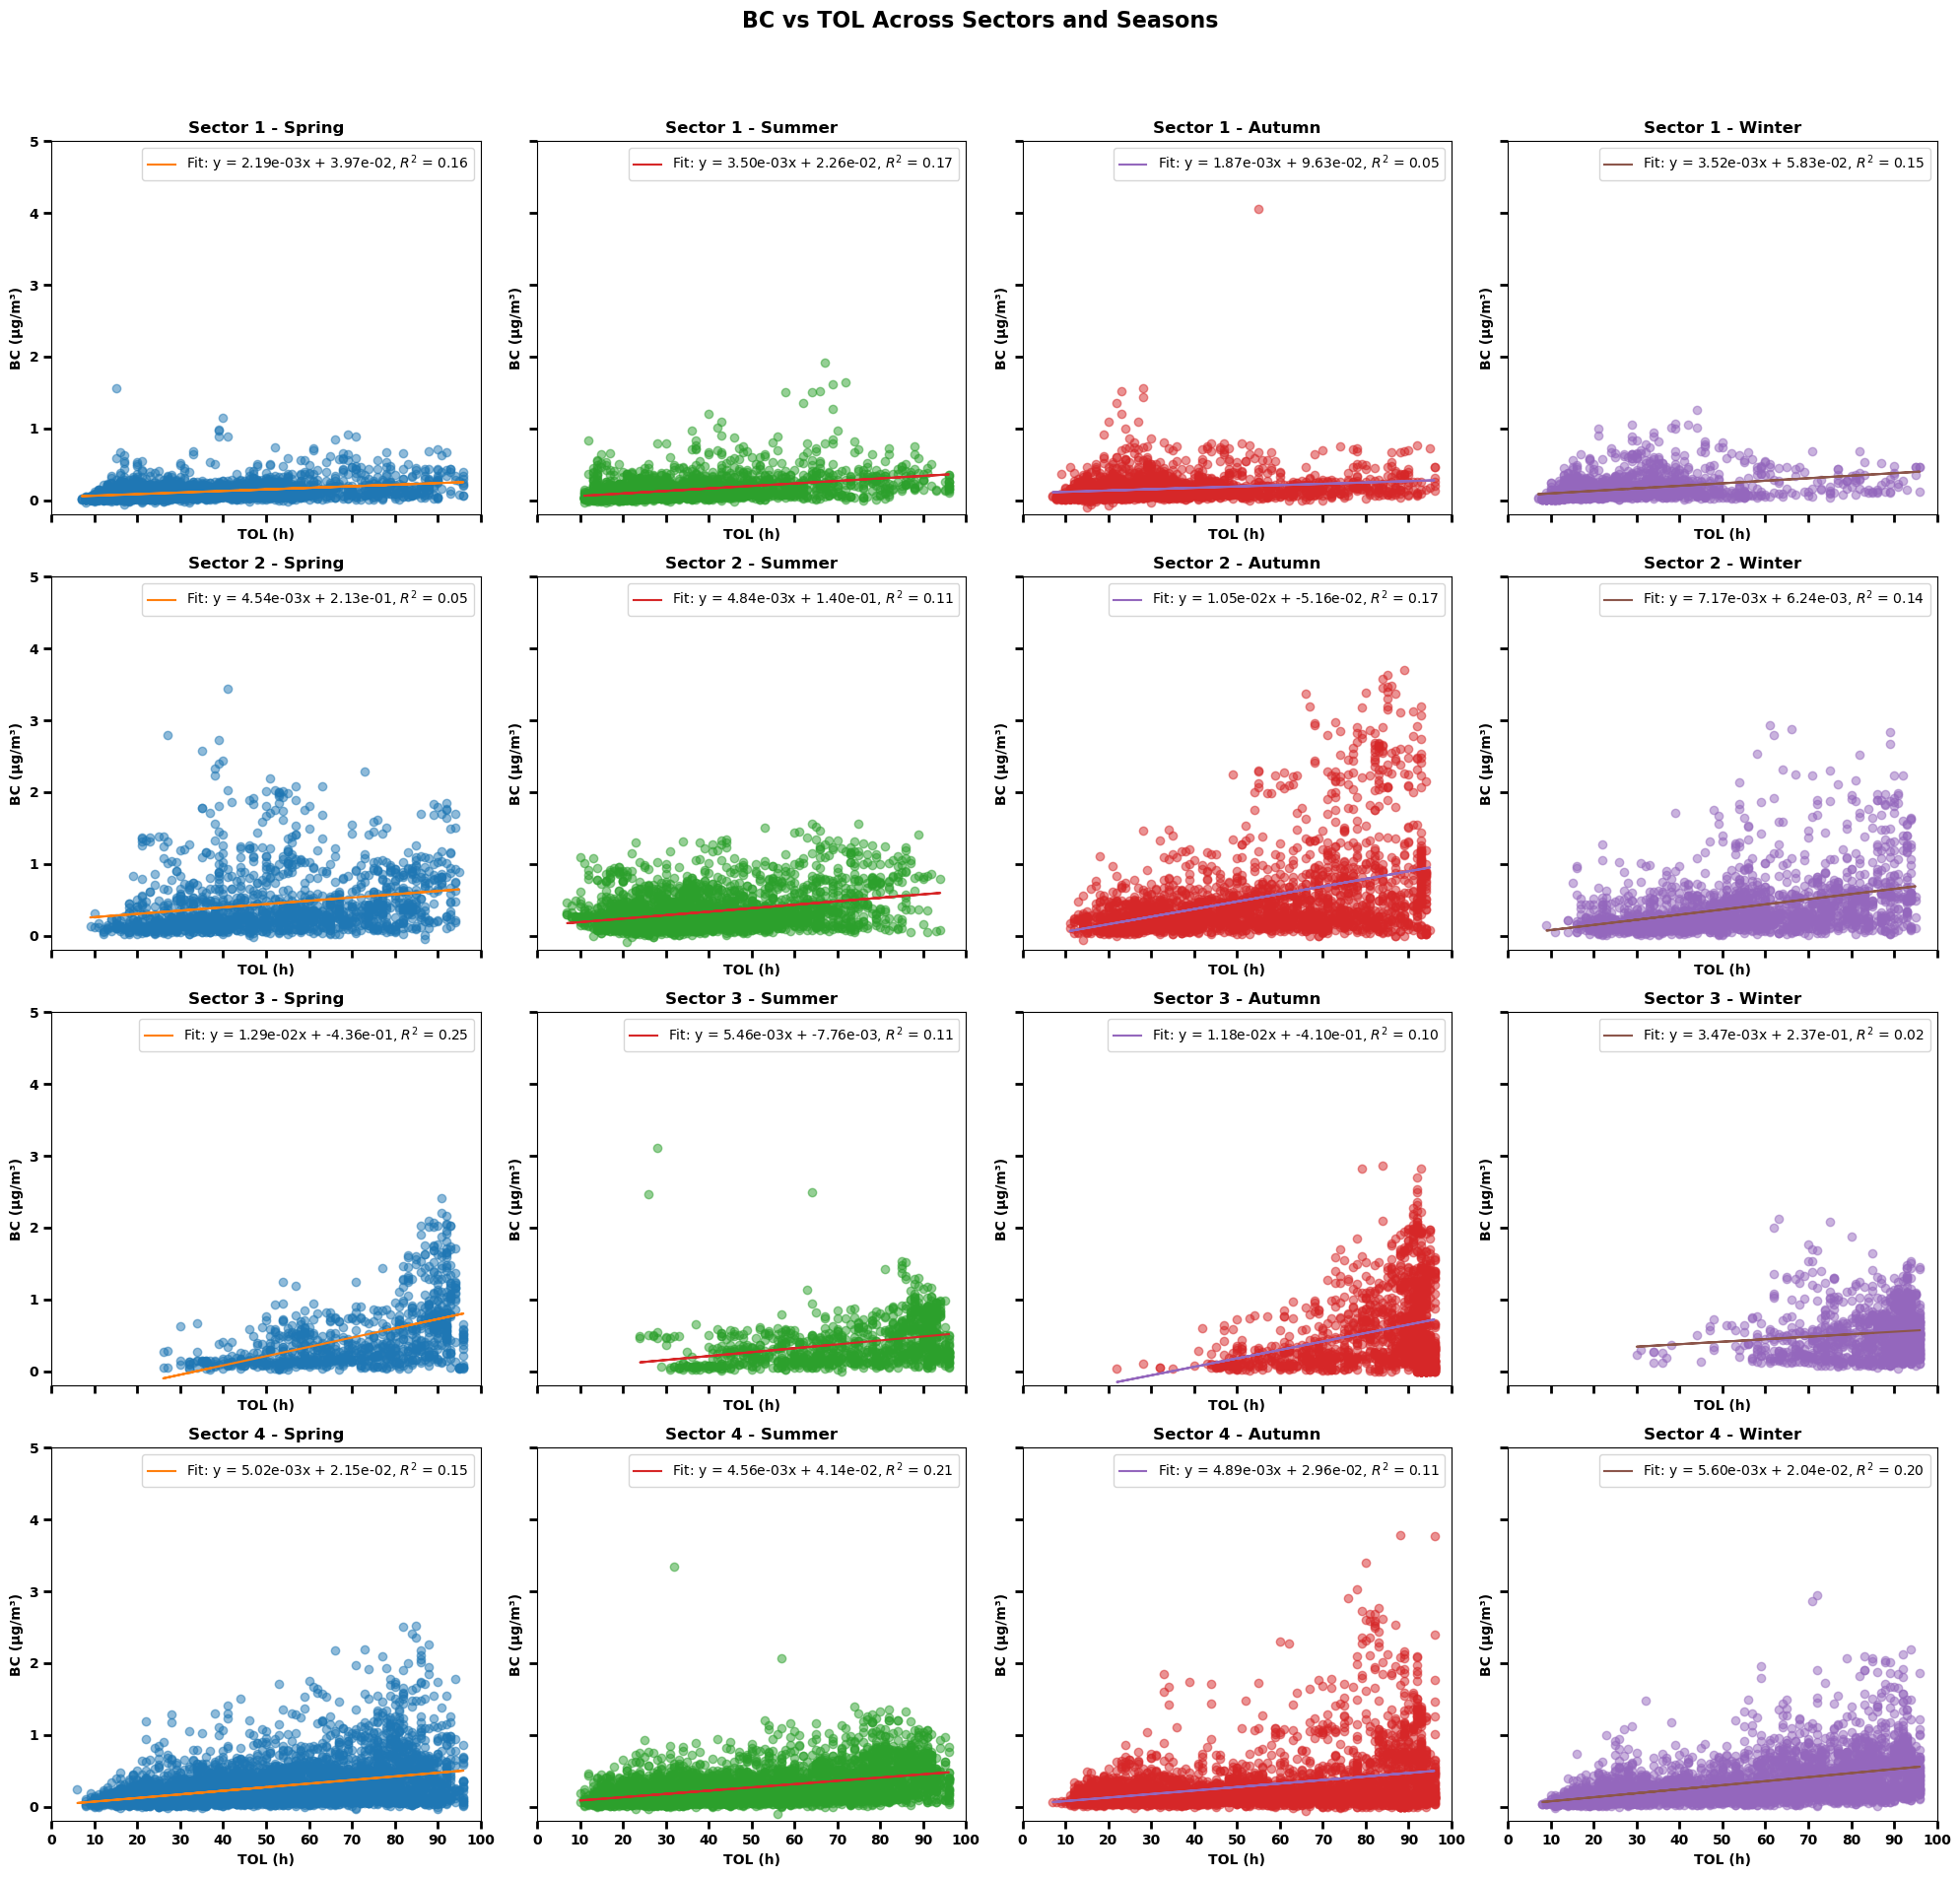

In [40]:
# 3rd Sept (BC Vs TOL ) 4 sectors & 4 Seasons (12 Plots)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the data
file_path = '/Users/touqeergill/Desktop/BC VS TOL2.xlsx'
data = pd.read_excel(file_path)

# Determine the season based on the date
def get_season(date):
    month = date.month
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

# Apply the function to the dataframe
data['Season'] = data['Date and Time'].apply(get_season)

# Handle missing and infinite values
data.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinities with NaN
data.dropna(subset=['TimeOverLand', 'BC'], inplace=True)  # Drop rows with NaN values

# Define the sectors and seasons
sectors = range(1, 5)
seasons = ['Spring', 'Summer', 'Autumn', 'Winter']

# Color and style settings
season_colors = {
    'Spring': ('#1f77b4', '#ff7f0e'),
    'Summer': ('#2ca02c', '#d62728'),
    'Autumn': ('#d62728', '#9467bd'),
    'Winter': ('#9467bd', '#8c564b')
}

# Manually set y-axis limits
y_min = -0.2  # Set your desired minimum y value here
y_max = 5     # Set your desired maximum y value here

# Custom tick values for x and y axes
x_ticks = np.arange(0, 101, 10)  # Ensures including 100

# Create plots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20), sharex='col', sharey='row')
fig.suptitle('BC vs TOL Across Sectors and Seasons', fontsize=16, fontweight='bold')

for i, sector in enumerate(sectors):
    for j, season in enumerate(seasons):
        ax = axes[i][j]
        sector_data = data[(data['Sector'] == sector) & (data['Season'] == season)]
        scatter_color, line_color = season_colors[season]

        # Scatter plot
        ax.scatter(sector_data['TimeOverLand'], sector_data['BC'], color=scatter_color, alpha=0.5)

        # Linear regression
        if not sector_data.empty:
            model = LinearRegression()
            X = sector_data[['TimeOverLand']]
            y = sector_data['BC']
            model.fit(X, y)
            y_pred = model.predict(X)
            ax.plot(X, y_pred, color=line_color, label=f'Fit: y = {model.coef_[0]:.2e}x + {model.intercept_:.2e}, $R^2$ = {r2_score(y, y_pred):.2f}')
            ax.legend()

        ax.set_title(f'Sector {sector} - {season}', fontweight='bold')
        ax.set_xlabel('TOL (h)', fontweight='bold')
        ax.set_ylabel('BC (µg/m³)', fontweight='bold')

        # Setting custom ticks and limits
        ax.set_xticks(x_ticks)
        ax.set_xlim(0, 100)  # Applying the manually set x-axis limits
        ax.set_ylim(y_min, y_max)  # Applying the manually set y-axis limits

        # Enhancing the prominence of ticks
        ax.tick_params(axis='both', which='major', labelsize=10, width=2, length=6)
        
        # Set tick labels bold
        for label in ax.get_xticklabels() + ax.get_yticklabels():
            label.set_fontweight('bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# Save the plot to the desktop
plt.savefig('/Users/touqeergill/Desktop/BC_VS_TOL_plot.png')
plt.show()

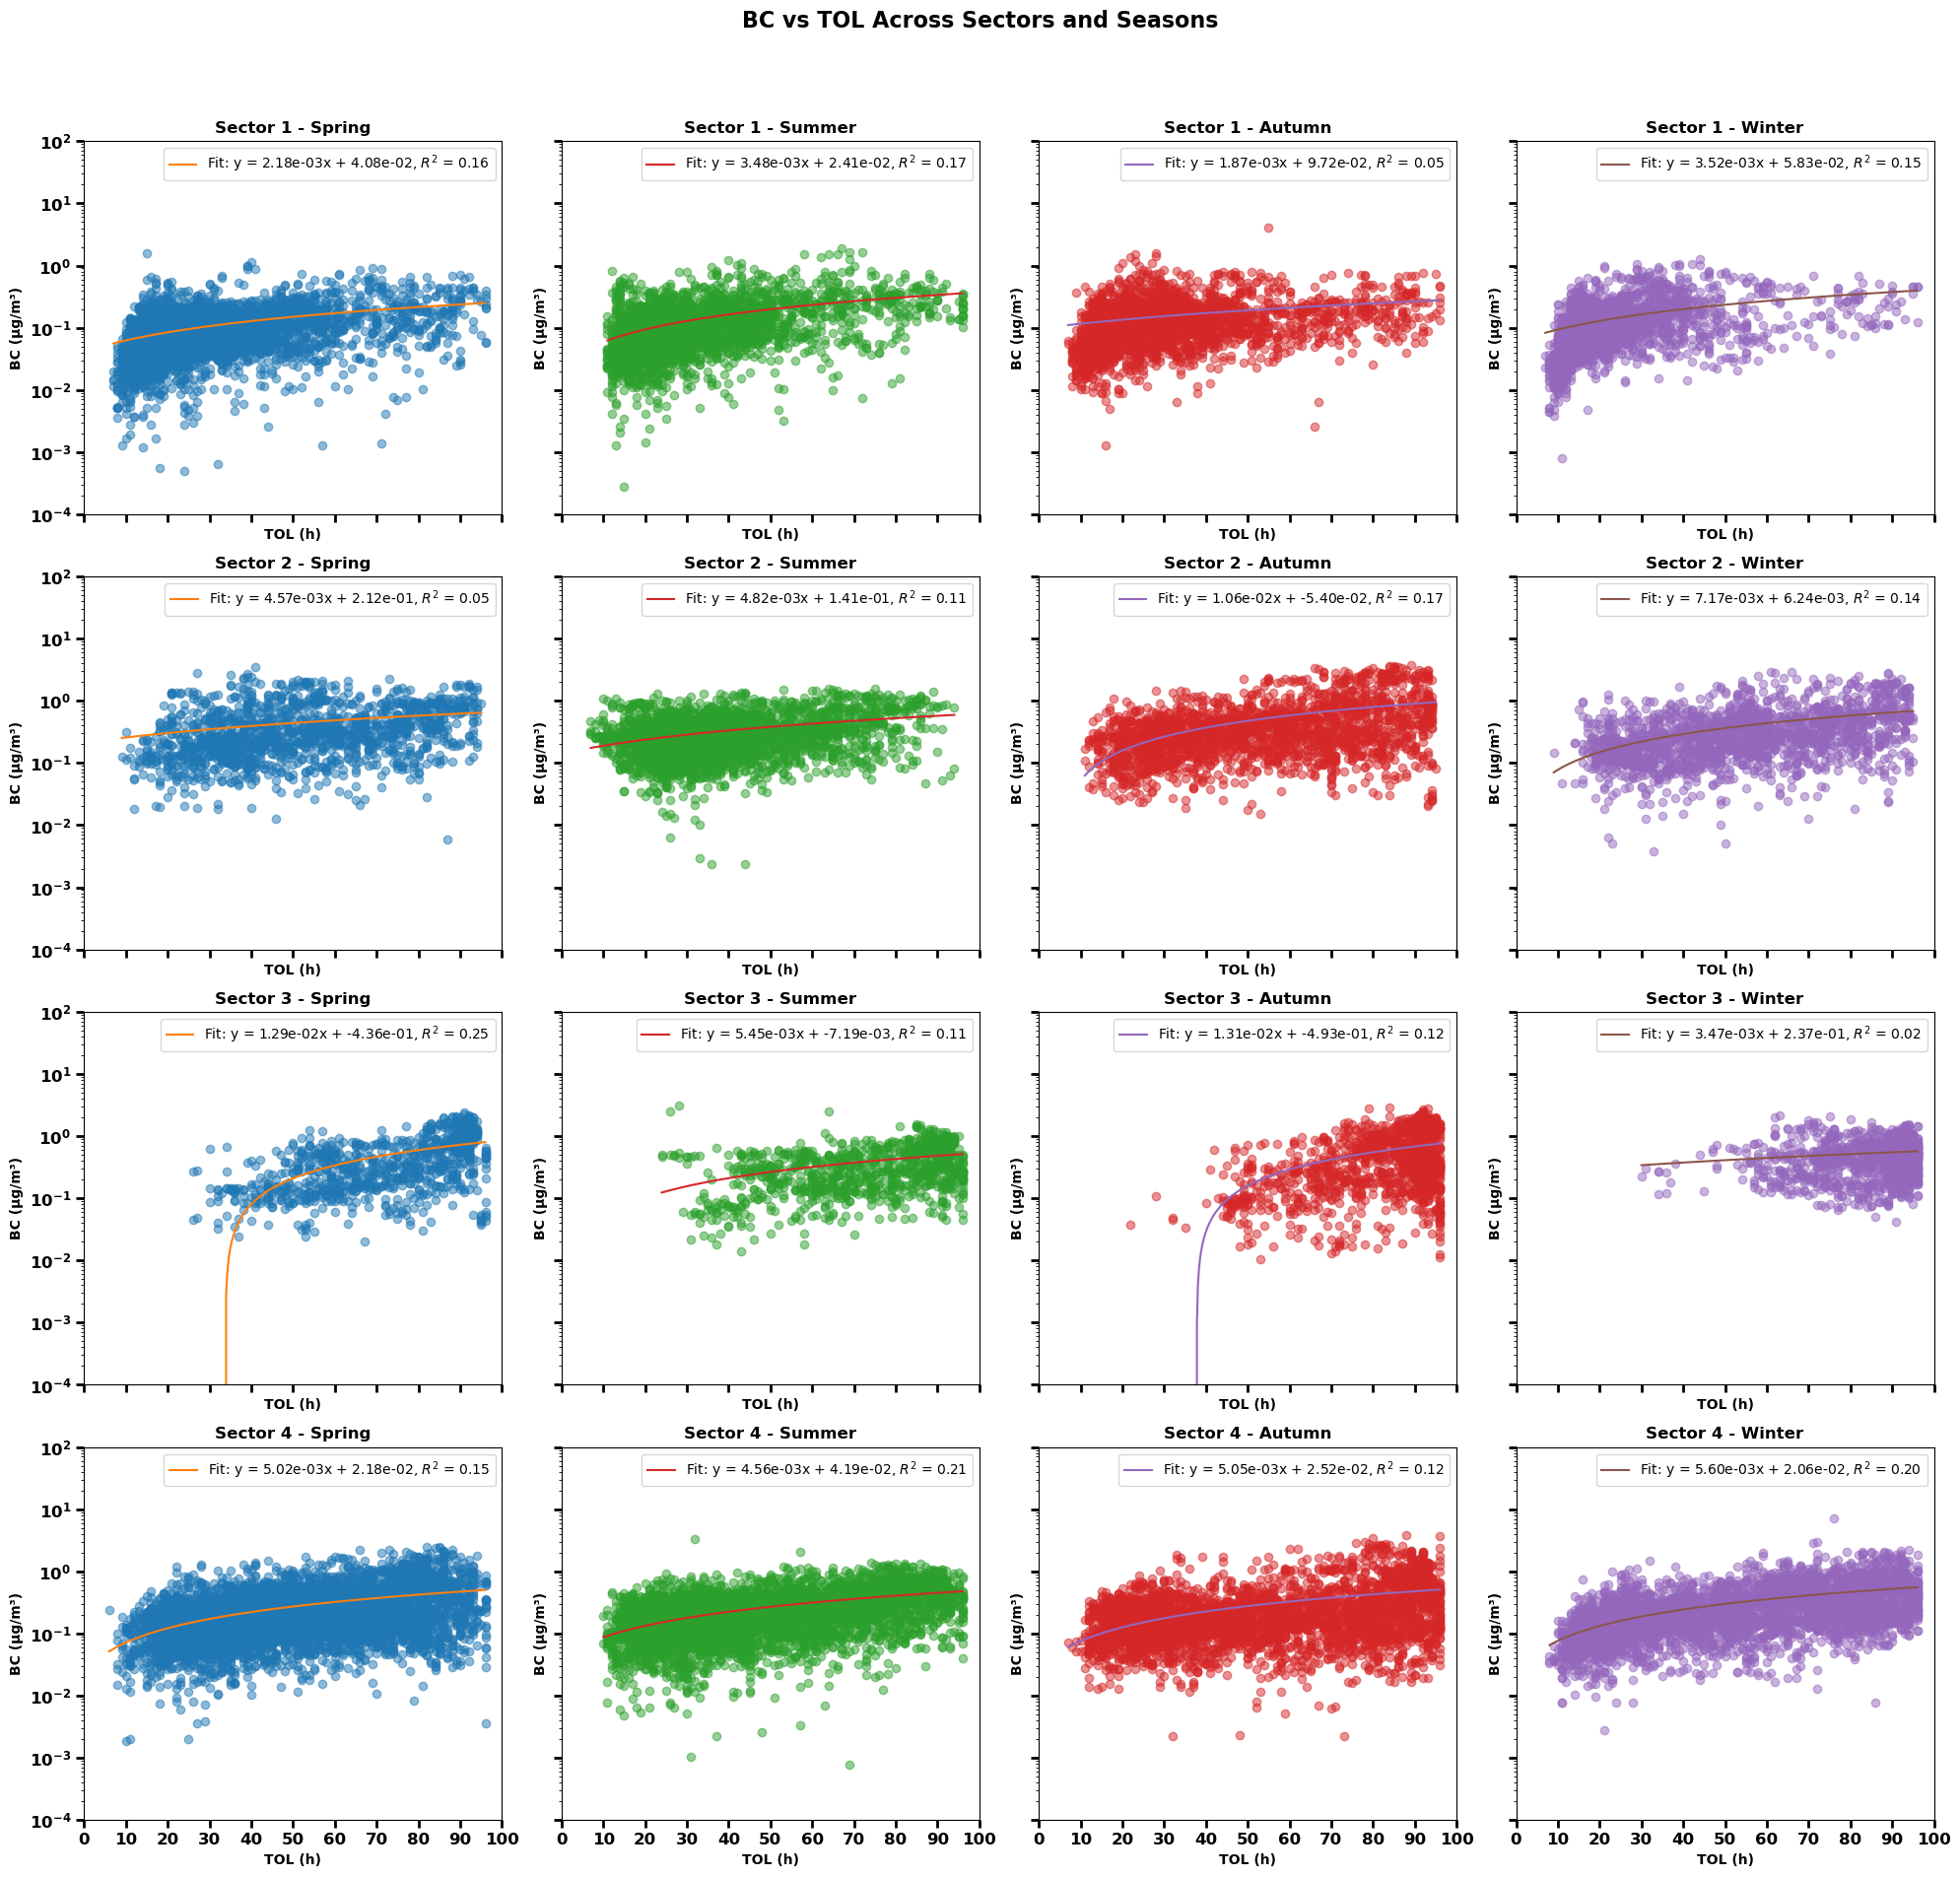

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Load the data
file_path = '/Users/touqeergill/Desktop/BC VS TOL2.xlsx'
data = pd.read_excel(file_path)

# Determine the season based on the date
def get_season(date):
    month = date.month
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

# Apply the function to the dataframe
data['Season'] = data['Date and Time'].apply(get_season)

# Remove rows with NaN or infinite values in key columns
data = data.replace([np.inf, -np.inf], np.nan)  # Convert infinities to NaN
data.dropna(subset=['TimeOverLand', 'BC'], inplace=True)  # Remove rows with NaN values

# Ensure no zero or negative values for log scale (if necessary)
data = data[data['BC'] > 0]

# Define the sectors and seasons
sectors = range(1, 5)
seasons = ['Spring', 'Summer', 'Autumn', 'Winter']

# Color and style settings
season_colors = {
    'Spring': ('#1f77b4', '#ff7f0e'),
    'Summer': ('#2ca02c', '#d62728'),
    'Autumn': ('#d62728', '#9467bd'),
    'Winter': ('#9467bd', '#8c564b')
}

# Manually set y-axis limits
y_min = 1e-4  # Adjust if necessary for log scale
y_max = 1e2   # Adjust if necessary

# Custom tick values for x and y axes
x_ticks = np.arange(0, 101, 10)  # Ensures including 100

# Create plots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20), sharex='col', sharey='row')
fig.suptitle('BC vs TOL Across Sectors and Seasons', fontsize=16, fontweight='bold')

for i, sector in enumerate(sectors):
    for j, season in enumerate(seasons):
        ax = axes[i][j]
        sector_data = data[(data['Sector'] == sector) & (data['Season'] == season)]
        scatter_color, line_color = season_colors[season]

        # Scatter plot
        ax.scatter(sector_data['TimeOverLand'], sector_data['BC'], color=scatter_color, alpha=0.5)

        # Linear regression
        if not sector_data.empty:
            model = LinearRegression()
            X = sector_data[['TimeOverLand']]
            y = sector_data['BC']
            model.fit(X, y)
            # Generate x_range for line drawing
            x_range = np.linspace(X['TimeOverLand'].min(), X['TimeOverLand'].max(), 300)
            x_range_df = pd.DataFrame(x_range, columns=['TimeOverLand'])
            y_line_pred = model.predict(x_range_df)
            ax.plot(x_range, y_line_pred, color=line_color, label=f'Fit: y = {model.coef_[0]:.2e}x + {model.intercept_:.2e}, $R^2$ = {r2_score(y, model.predict(X)):.2f}')
            ax.legend()

        ax.set_title(f'Sector {sector} - {season}', fontweight='bold')
        ax.set_xlabel('TOL (h)', fontweight='bold')
        ax.set_ylabel('BC (µg/m³)', fontweight='bold')
        ax.set_xticks(x_ticks)
        ax.set_xlim(0, 100)
        ax.set_yscale('log')
        ax.set_ylim(y_min, y_max)
        ax.tick_params(axis='both', which='major', labelsize=12, width=2, length=6)
        for label in ax.get_xticklabels() + ax.get_yticklabels():
            label.set_fontweight('bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('/Users/touqeergill/Desktop/BC_VS_TOL_plot.png')
plt.show()